In [47]:
from redis_vectorize.embed import EmbeddingModel
import pandas as pd
import faiss
from tqdm import trange
import numpy as np
import requests
import onnxruntime
from io import BytesIO
from PIL import Image
from matplotlib import pyplot as plt

In [ ]:
model = EmbeddingModel(filename="models/bge.quant.onnx")


In [110]:
examples = ["Хочу полетать",
"Нужен мощный пылесос",
"Хочу сходить в поход"]
examples.append("Нужно помыть дом")
examples.append("Хочу повесить полку на стену")
examples.append("Нужно сломать несущую стену")
examples.append("Нужен пылесос Dyson")
examples.append("Нужен пылесос Дайсон")


examples.append("Нужна дрель Макита")
examples.append("Нужна дрель Makita")


examples.append("Нужен отбойный молоток")
examples.append("Нужен перфоратор")


examples.append("Нужен телескоп")
examples.append("Нужен автомобильный тент")
examples.append("Нужна палатка для кемпинга")



In [99]:
df=pd.read_csv("data/archive-3/amazon_best.csv")

N = len(df)
df.index=range(N)
d=1024

embeddings=np.zeros((N,d))

In [100]:

index = faiss.IndexFlatL2(d)


In [101]:
for i in trange(N):
    image_features = model.embed(df.loc[i]['title'])
    embeddings[i] = image_features
index.add(embeddings)

100%|██████████| 4439/4439 [03:13<00:00, 22.96it/s]


Хочу полетать ['EMAX Tinyhawk 3 RTF Kit 1s FRSKY FPV Drone for Beginners with Controller and 5.6G Goggles Quadcopter Ready to Fly Kit']
Нужен мощный пылесос ['Aspiron Upgraded Canister Vacuum Cleaner, 1200W Bagless Vacuum Cleaner, 3.7Qt Large Capacity, Auto Cord Rewind, Double HEPA Filter, 5 Tools for Hard Floors, Carpet, Pet, Upholstery, Tiles, Car, Silver']
Хочу сходить в поход ['Hike Crew Outdoor Gas Camping Oven w/Carry Bag | CSA Approved Portable Propane-Powered 2-Burner Stove & Oven | Auto Ignition, Overheat Safety Shutoff, Built-In Thermometer | Hose & Regulator Included']
Нужно помыть дом ['H2O Mop X5 Dualblast All-Purpose Steam Cleaner for Home Use, Floor Cleaner, Grout cleaner, Hand Held steamer and Upholstery cleaner,Ideal for hardwood, tiles, grout, floor, upholstery, carpet']
Хочу повесить полку на стену ['Retractable White Photo ID Backdrop for Passport Photos (Wall/Ceiling)']
Нужно сломать несущую стену ['Berserker 1700W 30-Pound SDS-Hex Demolition Jack Hammer,1-1/8" 14-

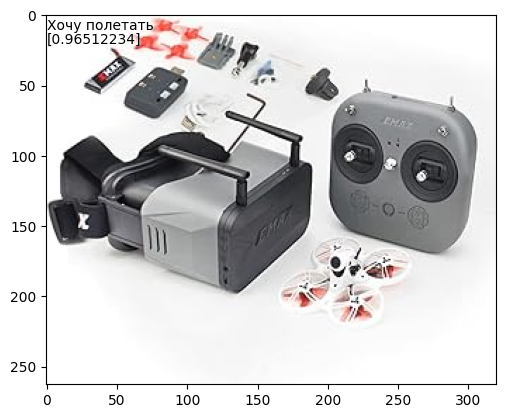

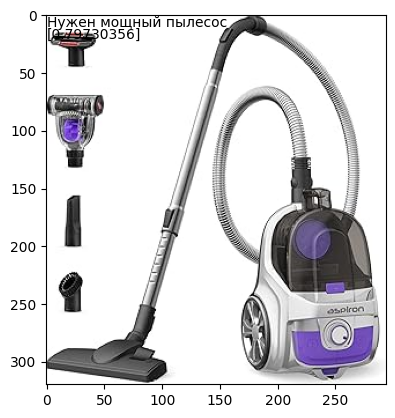

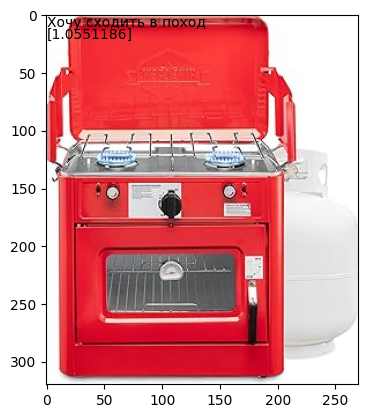

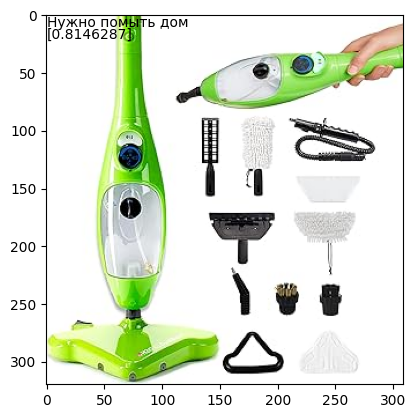

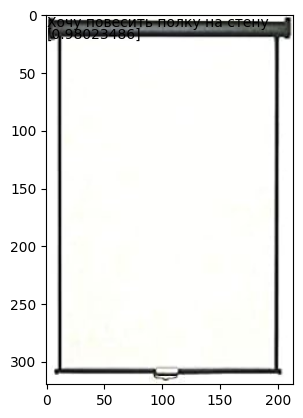

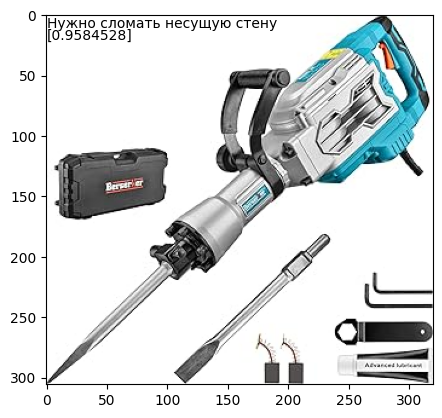

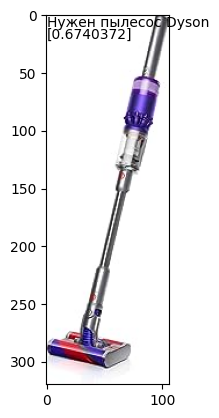

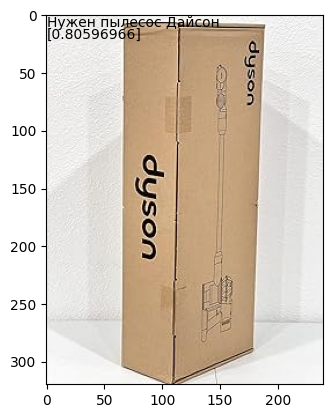

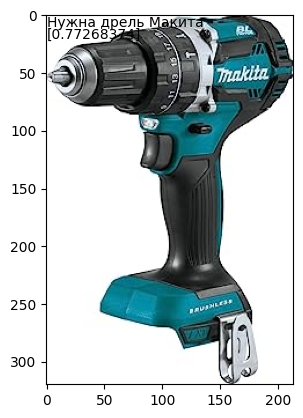

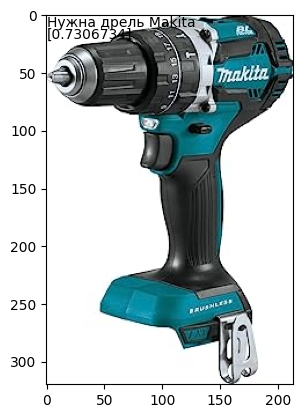

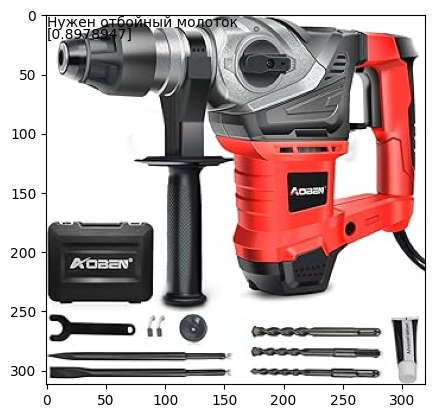

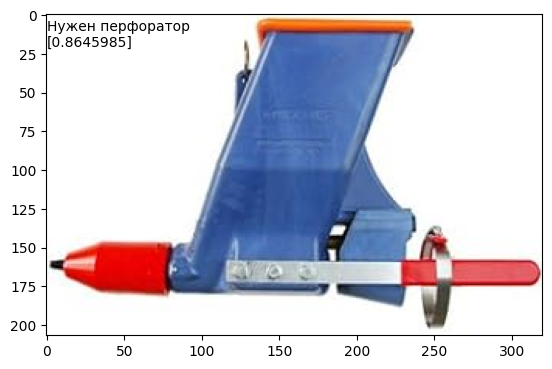

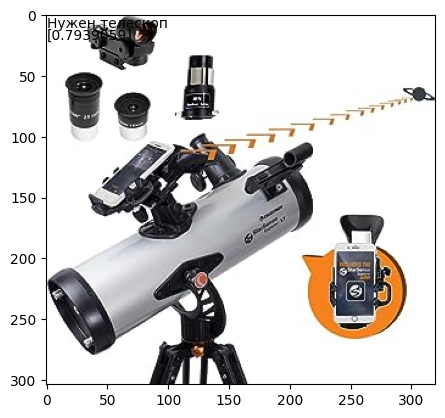

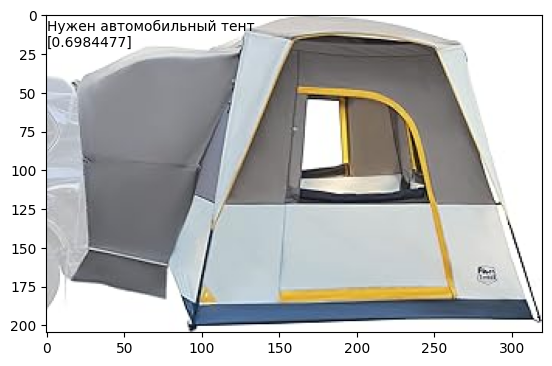

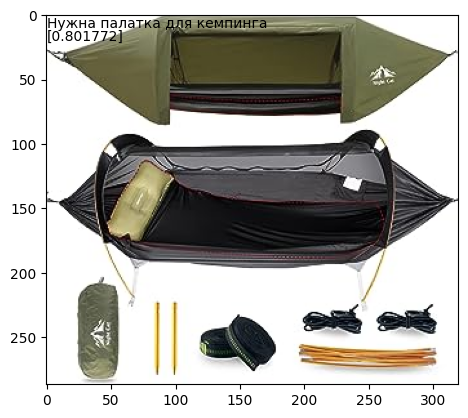

<Figure size 640x480 with 0 Axes>

In [112]:
for example in examples:
    query = model.embed(example)
    d,ind = index.search(query, k=1)
    print(example, df.iloc[ind[0]]['title'].values)
    image_url = df.iloc[ind[0]]['imgUrl'].values[0]
    response = requests.get(image_url)
    im=Image.open(BytesIO(response.content))
    plt.imshow(im)
    plt.text(0,10, example)
    plt.text(0,20, f"{d[0]}")
    plt.figure()